<a href="https://colab.research.google.com/github/Arpitkamal/Deep-Learning---Getting-Started/blob/master/Python_basics%2BLinear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive and Colab Integration

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1u7UkCM14eCopiL_H206YX3qO3zswrBHh


In [0]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'File2.txt'})
uploaded.SetContentString('hello world')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 17WgTrbfG7p8v5NYnwX-Ld4uxK6q83UEG


In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title train.csv, id 1tAxY4tOVqa5n-ZQL4QgjI4AumE-ZYpZ3
title mobile_cleaned-1551253091700.csv, id 1dfoXGWVOeKJIWIn2LSEKrN-ovccNjAx9


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1dfoXGWVOeKJIWIn2LSEKrN-ovccNjAx9' #hhttps://drive.google.com/open?id=1tAxY4tOVqa5n-ZQL4QgjI4AumE-ZYpZ3
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [0]:
!ls

adc.json	mobile_cleaned_local.csv  Titanic_local.csv
File_local.csv	sample_data


# Pandas

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('mobile_cleaned_local.csv')

In [0]:
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
df.tail()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
336,465,220,5.0,141,1,1.2,67.20,142.7,16,2420,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3.8
337,466,401,5.5,165,4,1.8,69.95,156.5,64,3000,13,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3.9
338,468,282,5.2,160,3,1.4,68.52,149.7,16,3000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.1
339,470,218,4.5,156,1,1.3,63.93,132.0,8,1800,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3.6
340,472,401,5.5,153,3,1.8,74.21,151.1,32,3000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df) #shows all different function available under this object

In [0]:
len(df)

341

In [0]:
df.shape

(341, 88)

In [0]:
df.loc[3] #details of phone 3

PhoneId                          4.0
Pixel Density                  411.0
Screen Size                      6.0
Weight                         169.0
RAM                              4.0
                               ...  
SIM Slot(s)_Single SIM, GSM      0.0
Sim1_2G                          0.0
Sim1_3G                          0.0
Sim1_4G                          1.0
Rating                           4.3
Name: 3, Length: 88, dtype: float64

In [0]:
de_short = df[0:10]

In [0]:
de_short.shape

(10, 88)

In [0]:
de_short.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
df_thin = df[['Screen Size', 'RAM', 'Processor_frequency', 'Capacity', 'Rating']]

In [0]:
df_thin.shape

(341, 5)

In [0]:
df_thin.head()

,Screen Size,RAM,Processor_frequency,Capacity,Rating
0,6.26,4,1.8,4000,4.5
1,6.20,3,1.8,4230,4.5
2,6.30,3,2.1,3500,4.4
3,6.00,4,2.2,3300,4.3
4,6.50,4,2.2,3750,4.4


In [0]:
df_rating = df_thin[df_thin['Rating'] > 4.0]

In [0]:
df_rating.shape

(200, 5)

In [0]:
df_thin['Capacity'].mean()

3191.307917888563

In [0]:
df_thin['Capacity'].max()

13000

In [0]:
df_thin['Capacity'].describe()

count      341.000000
mean      3191.307918
std        932.533527
min       1020.000000
25%       2900.000000
50%       3055.000000
75%       3750.000000
max      13000.000000
Name: Capacity, dtype: float64

In [0]:
df_thin.describe()

,Screen Size,RAM,Processor_frequency,Capacity,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000
mean,5.462317,11.120235,1.792551,3191.307918,4.072434
std,0.742529,61.320855,0.451598,932.533527,0.377066
min,2.400000,1.000000,1.000000,1020.000000,2.500000
25%,5.200000,2.000000,1.400000,2900.000000,3.900000
50%,5.500000,3.000000,1.800000,3055.000000,4.100000
75%,6.000000,4.000000,2.200000,3750.000000,4.300000
max,6.590000,512.000000,2.800000,13000.000000,5.000000


In [0]:
df_thin[df_thin['Rating'] > 4.0]['Capacity'].mean()

3300.505

In [0]:
g = df_thin.groupby(['RAM'])

In [0]:
for key, df_key in g:
  print(key)
  print(df_key)

1
     Screen Size  RAM  Processor_frequency  Capacity  Rating
54          5.45    1                 1.50      3000     4.0
63          5.50    1                 1.40      4000     4.0
92          4.50    1                 1.10      2150     3.9
100         4.70    1                 1.40      1810     4.3
141         5.00    1                 1.30      4100     3.7
155         5.45    1                 1.10      2400     3.5
179         4.00    1                 1.30      1400     3.4
192         5.20    1                 1.30      5000     3.8
197         4.50    1                 1.10      2000     3.5
199         4.70    1                 1.30      2000     4.1
209         4.00    1                 1.30      1600     3.7
213         4.70    1                 1.40      1810     4.4
230         5.00    1                 1.30      2400     5.0
245         5.00    1                 1.10      2500     4.0
252         4.00    1                 1.30      2300     3.3
256         4.50    1 

In [0]:
df_thin.groupby(['RAM']).mean()

,Screen Size,Processor_frequency,Capacity,Rating
RAM,,,,
1,4.742759,1.278621,2402.068966,3.824138
2,5.276269,1.527761,2893.626866,4.046269
3,5.468182,1.726061,3295.616162,3.983838
4,5.798085,1.999468,3425.500000,4.182979
6,6.094118,2.299706,3873.235294,4.358824
8,5.518000,2.363000,3283.000000,4.130000
16,2.400000,1.790000,1020.000000,4.200000
32,2.400000,1.790000,1200.000000,4.100000
64,2.800000,1.790000,1200.000000,4.100000


In [0]:
df_thin.groupby(['RAM']).max()

,Screen Size,Processor_frequency,Capacity,Rating
RAM,,,,
1,5.50,1.50,5000,5.0
2,6.22,2.50,5000,4.7
3,6.30,2.60,5100,4.6
4,6.50,2.60,5300,4.8
6,6.50,2.80,13000,5.0
8,6.59,2.80,4000,4.6
16,2.40,1.79,1020,4.2
32,2.40,1.79,1200,4.1
64,2.80,1.79,1200,4.1


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

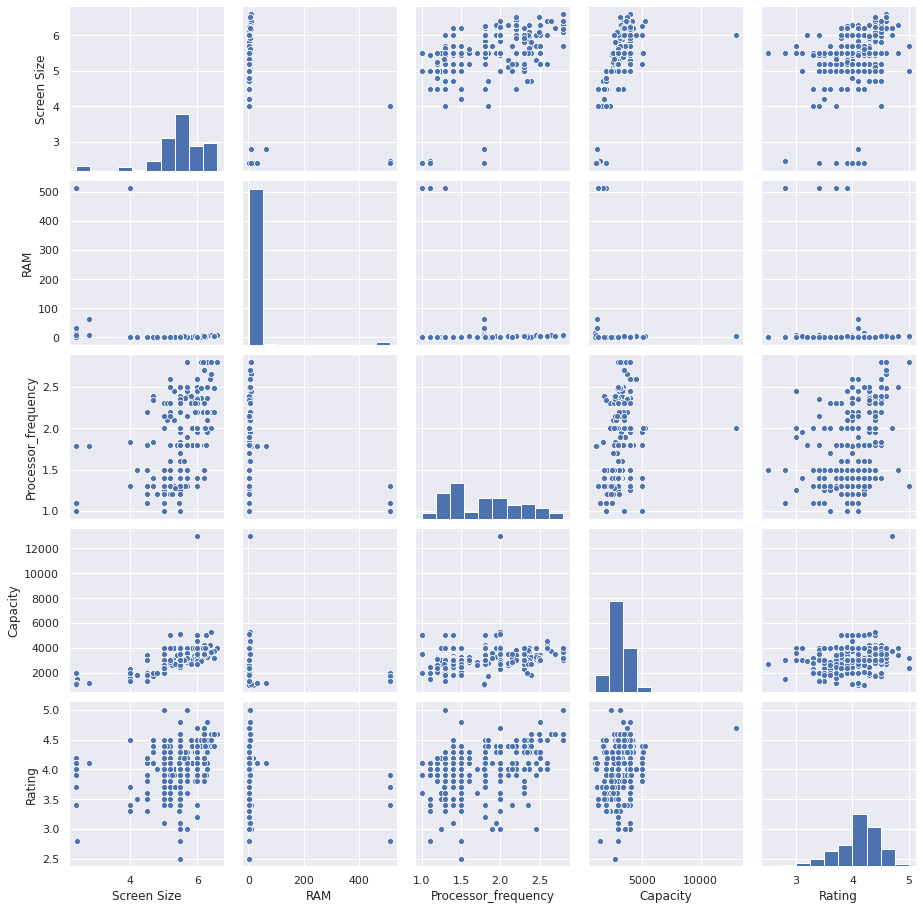

In [0]:
ax = sns.pairplot(df_thin, diag_kind='hist')

ERROR! Session/line number was not unique in database. History logging moved to new session 60


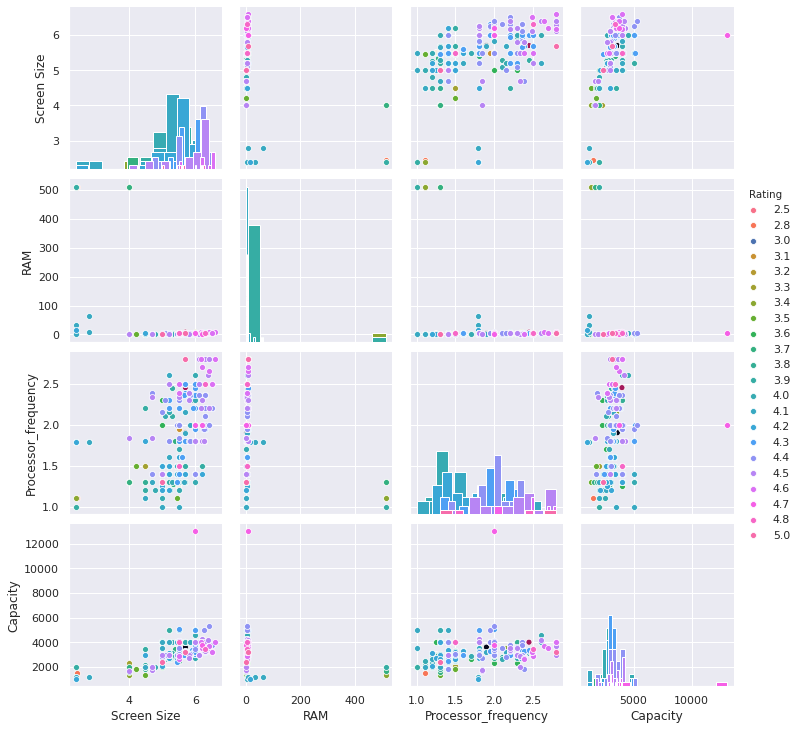

In [0]:
ax = sns.pairplot(df_thin, diag_kind='hist', hue='Rating')

# Python Debugger

In [0]:
import random

In [0]:
def factorial(x):
  if(x == 0):
    return 1
  return x * factorial(x-1) 

In [3]:
factorial(5)

120

In [0]:
def code_to_debug():
  #import pdb; pdb.set_trace() #python debugging library

  for i in range(10):
    x = random.random()
    factorial(x)

In [5]:
code_to_debug() #only tell you the problem not the value

> <ipython-input-4-67f5d33c4a04>(4)code_to_debug()
-> for i in range(10):
(Pdb) n
> <ipython-input-4-67f5d33c4a04>(5)code_to_debug()
-> x = random.random()
(Pdb) n
> <ipython-input-4-67f5d33c4a04>(6)code_to_debug()
-> factorial(x)
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help step
s(tep)
        Execute the current line, stop at the first possible occasion
        (either in a function that is called or in the current

BdbQuit: ignored

In [13]:
%xmode Verbose #now this will tell you where the problem is along with x value

/usr/local/lib/python3.6/dist-packages/IPython/core/magics/basic.py:374: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <Verbose #now this will tell you where the problem is along with x value>
Valid modes: ['Plain', 'Context', 'Verbose']
  (name,sys.exc_info()[1]))


In [14]:
code_to_debug() 

RecursionError: ignored

1


In [0]:
def factorial_debugged(x):
  if (not isinstance(x, int)): 
    print('This method only supports integers')
  x=int(x)  
  if(x == 0):
    return 1
  return x * factorial(x-1) 

In [0]:
def code_to_debug():
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [36]:
code_to_debug()

This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers


# Plotting Vectors

In [0]:
import numpy as np
import matplotlib.pyplot as plt

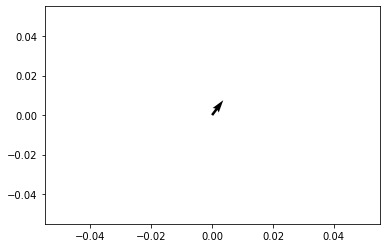

In [39]:
plt.quiver(0,0,3,4) #use to plot vectors in matplotlib
plt.show()

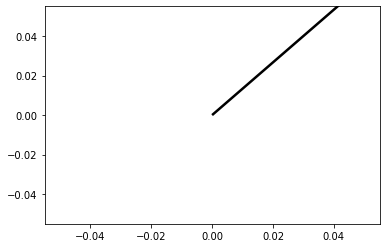

In [40]:
plt.quiver(0,0,3,4, scale_units='xy', angles='xy', scale=1) 
plt.show()

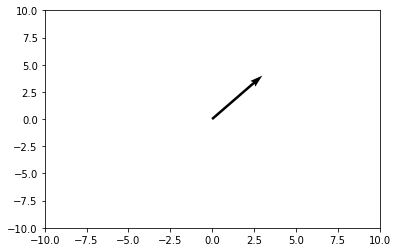

In [43]:
plt.quiver(0,0,3,4, scale_units='xy', angles='xy', scale=1) 
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

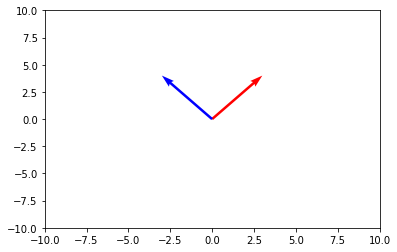

In [45]:
plt.quiver(0,0,3,4, scale_units='xy', angles='xy', scale=1, color='r') 
plt.quiver(0,0,-3,4, scale_units='xy', angles='xy', scale=1, color='b') 
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [0]:
def plot_vectors(vecs):
  colors = ['r', 'b', 'g', 'y','b']
  i = 0
  for vec in vecs:
    plt.quiver(vec[0],vec[1],vec[2],vec[3], scale_units='xy', angles='xy', scale=1, color=colors[i%len(colors)]) 
    i +=1
  plt.xlim(-15,10)
  plt.ylim(-15,10)
  plt.show()


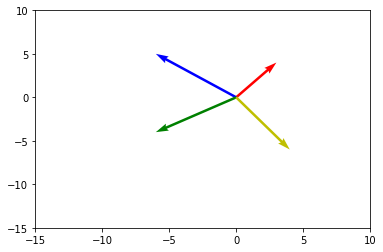

In [81]:
plot_vectors([(0,0,3,4), (0,0,-6,5), (0,0,-6,-4), (0,0,4,-6)])

# Vector Addition and Subtraction

In [0]:
vecs = [(0,0,3,4), (0,0,-6,5), (0,0,-6,-4), (0,0,4,-6)]

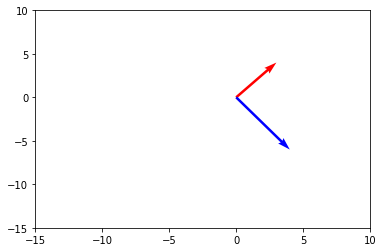

In [83]:
plot_vectors([vecs[0], vecs[3]])

In [84]:
vecs[0] + vecs[3] #this concatinate the tuples

(0, 0, 3, 4, 0, 0, 4, -6)

In [0]:
#To add vectors we have to use numpy arrays
vecs = [np.asarray([0,0,3,4]), np.asarray([0,0,-6,5]), np.asarray([0,0,-6,-4]), np.asarray([0,0,4,-6])]

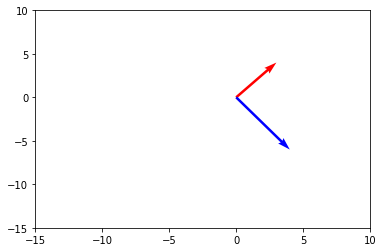

In [86]:
plot_vectors([vecs[0], vecs[3]])

In [87]:
vecs[0] + vecs[3]

array([ 0,  0,  7, -2])

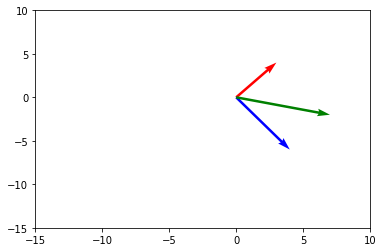

In [88]:
plot_vectors([vecs[0], vecs[3], vecs[0]+vecs[3]])

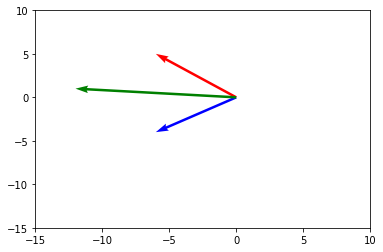

In [89]:
plot_vectors([vecs[1], vecs[2], vecs[1]+vecs[2]])

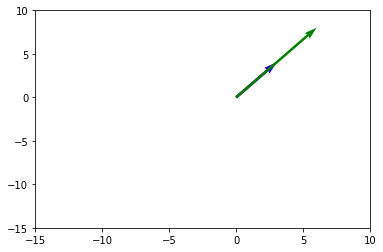

In [90]:
plot_vectors([vecs[0], vecs[0], vecs[0]+vecs[0]])

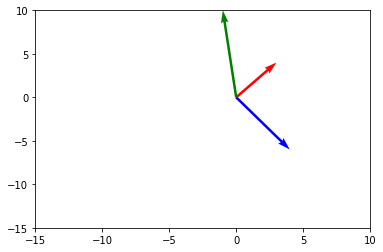

In [91]:
plot_vectors([vecs[0], vecs[3], vecs[0]-vecs[3]])

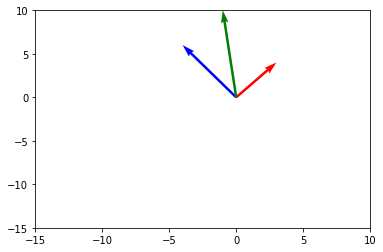

In [92]:
plot_vectors([vecs[0], -vecs[3], vecs[0]+(-vecs[3])])

# Vector dot product

In [0]:
vecs = [np.asarray([0,0,3,4]), np.asarray([0,0,-6,5]), np.asarray([0,0,-6,-4]), np.asarray([0,0,4,-6])]

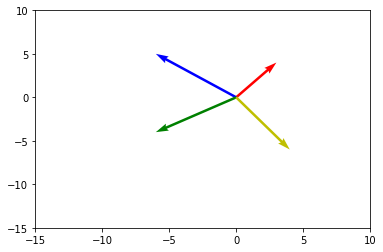

In [96]:
plot_vectors(vecs)

In [0]:
a = np.asarray([3, 4])
b = np.asarray([-3, 5])

$\vec{a}\cdot\vec{b} = |\vec{a}||\vec{b}|\cos(\theta)=a_x b_x+a_yb_y$

In [0]:
a_dot_b = np.dot(a, b)

In [121]:
print(a_dot_b)

11


**Projection a onto b**

$a_b = |\vec{a}|\cos(\theta) = |\vec{a}|\frac{\vec{a}\cdot\vec{b}}{|\vec{a}||\vec{b}|}= \frac{\vec{a}\cdot\vec{b}}{|\vec{b}|}$

In [0]:
a_b = np.dot(a, b)/np.linalg.norm(b)

In [123]:
print(a_b)

1.8864844365675972


***Try to plot but for that you need magnitude(-1.66) and direction along b***

**To Plot vector do this**

$\vec{a_b} = a_b\hat{b} = a_b\frac{\vec{b}}{|\vec{b}|}$


In [124]:
vec_a_b = (a_b/np.linalg.norm(b))*b
print(vec_a_b)

[-0.97058824  1.61764706]


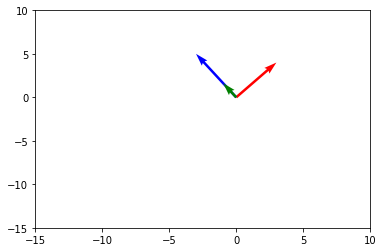

In [125]:
plot_vectors([np.asarray([0,0,3,4]), np.asarray([0,0,-3,5]),np.asarray([0,0,-0.97058824, 1.61764706])])

In [0]:

a = np.asarray([9, 2])
b = np.asarray([-5, 4])

In [127]:
a_dot_b = np.dot(a, b)
print(a_dot_b)

-37


In [0]:
a_b = np.dot(a, b)/np.linalg.norm(b)

In [129]:
print(a_b)

-5.778429189878424


In [130]:
vec_a_b = (a_b/np.linalg.norm(b))*b
print(vec_a_b)

[ 4.51219512 -3.6097561 ]


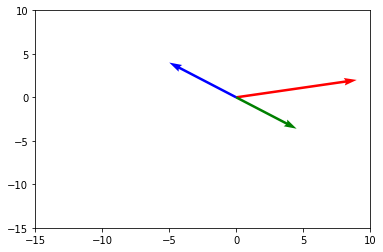

In [131]:
plot_vectors([np.asarray([0,0,9,2]), np.asarray([0,0,-5,4]),np.asarray([0,0,4.51219512, -3.6097561])])